In [2]:
import sys, os
# Il notebook è in quant-pricing/notebooks → sali alla root del progetto
sys.path.append(os.path.abspath(".."))
print("Project root:", os.path.abspath(".."))

Project root: c:\Users\valen\Documents\finance interviste\progettini_cv\quant-pricing


In [3]:
import time
from pricing.mc_pricer import price_european_mc, delta_vega_bump
from pricing.black_scholes import bs_price, bs_delta, bs_vega

# Parametri base
S0, K, r, vol, T = 100.0, 100.0, 0.02, 0.20, 1.0
steps = 252
n_paths = 200_000

# Prezzo Monte Carlo
t0 = time.time()
mc_price, mc_se = price_european_mc(
    S0, K, r, vol, T,
    steps=steps, n_paths=n_paths,
    call=True, antithetic=True, seed=123
)
t1 = time.time()

# Prezzo Black–Scholes (riferimento) ed errore relativo
bs_p = bs_price(S0, K, r, vol, T, call=True)
rel_err = abs(mc_price - bs_p) / bs_p * 100

# Greek con metodo bump-and-revalue (riuso degli stessi random numbers)
delta_mc, vega_mc = delta_vega_bump(
    S0, K, r, vol, T,
    steps=steps, n_paths=n_paths, call=True
)
delta_bs = bs_delta(S0, K, r, vol, T, call=True)
vega_bs  = bs_vega(S0, K, r, vol, T)

print(f"MC price: {mc_price:.4f} ± {mc_se:.4f} (time {t1-t0:.2f}s)")
print(f"BS price: {bs_p:.4f}  | Rel. error: {rel_err:.3f}%")
print(f"Delta MC/BS: {delta_mc:.4f} / {delta_bs:.4f}")
print(f"Vega  MC/BS: {vega_mc:.4f} / {vega_bs:.4f}")

MC price: 8.9113 ± 0.0218 (time 4.51s)
BS price: 8.9160  | Rel. error: 0.053%
Delta MC/BS: 0.5795 / 0.5793
Vega  MC/BS: 39.2288 / 39.1043


In [5]:
import time
from pricing.mc_pricer import price_european_mc

S0, K, r, vol, T = 100, 100, 0.02, 0.20, 1.0
steps = 252

for n_paths in [200_000, 500_000, 1_000_000]:
    t0 = time.time()
    p, se = price_european_mc(
        S0, K, r, vol, T,
        steps=steps, n_paths=n_paths,
        call=True, antithetic=True, seed=123
    )
    dt = time.time() - t0
    print(f"{n_paths:,} paths -> price {p:.4f} ± {se:.4f} in {dt:.2f}s")

200,000 paths -> price 8.9113 ± 0.0218 in 2.04s
500,000 paths -> price 8.9094 ± 0.0138 in 12.90s
1,000,000 paths -> price 8.9102 ± 0.0097 in 77.35s


first run where it compile just in time
200,000 paths -> price 8.9113 ± 0.0218 in 5.38s
500,000 paths -> price 8.9094 ± 0.0138 in 17.04s
1,000,000 paths -> price 8.9102 ± 0.0097 in 99.59s

In [6]:
import time
from pricing.mc_pricer import price_european_mc, delta_vega_bump
from pricing.black_scholes import bs_price, bs_delta, bs_vega

S0, K, r, vol, T = 100.0, 100.0, 0.02, 0.20, 1.0
steps = 252
n_paths = 200_000

t0 = time.time()
mc_price, mc_se = price_european_mc(
    S0, K, r, vol, T,
    steps=steps, n_paths=n_paths,
    call=True, antithetic=True, seed=123
)
dt = time.time() - t0

bs_p = bs_price(S0, K, r, vol, T, call=True)
delta_bs = bs_delta(S0, K, r, vol, T, call=True)
vega_bs = bs_vega(S0, K, r, vol, T)

delta_mc, vega_mc = delta_vega_bump(S0, K, r, vol, T, steps=steps, n_paths=n_paths, call=True)

print(f"MC price: {mc_price:.4f} ± {mc_se:.4f} (time {dt:.2f}s)")
print(f"BS price: {bs_p:.4f} | Rel. error: {abs(mc_price-bs_p)/bs_p*100:.3f}%")
print(f"Delta MC/BS: {delta_mc:.4f} / {delta_bs:.4f}")
print(f"Vega MC/BS: {vega_mc:.4f} / {vega_bs:.4f}")

MC price: 8.9113 ± 0.0218 (time 2.14s)
BS price: 8.9160 | Rel. error: 0.053%
Delta MC/BS: 0.5795 / 0.5793
Vega MC/BS: 39.2288 / 39.1043


In [2]:
from pricing.mc_pricer import price_asian_mc, price_barrier_mc

S0, K, r, vol, T = 100.0, 100.0, 0.02, 0.20, 1.0
steps, n_paths = 252, 200_000

# Asian senza/ con control variate
p_as_naive, se_as_naive = price_asian_mc(S0, K, r, vol, T, steps, n_paths, control_variate=False, seed=123)
p_as_cv,    se_as_cv    = price_asian_mc(S0, K, r, vol, T, steps, n_paths, control_variate=True,  seed=123)

print(f"Asian naive: {p_as_naive:.4f} ± {se_as_naive:.4f}")
print(f"Asian CV   : {p_as_cv:.4f} ± {se_as_cv:.4f} (var reduction x{(se_as_naive/se_as_cv):.1f})")

# Barrier down-and-out (scegli H)
H = 90.0
p_bar, se_bar = price_barrier_mc(S0, K, H, r, vol, T, steps, n_paths, seed=123)
print(f"Barrier D&O (H={H}): {p_bar:.4f} ± {se_bar:.4f}")

Asian naive: 5.0333 ± 0.0120
Asian CV   : 5.0333 ± 0.0066 (var reduction x1.8)
Barrier D&O (H=90.0): 7.4983 ± 0.0215


In [2]:
from pricing.mc_pricer import delta_vega_bump_asian, delta_vega_bump_barrier

S0, K, r, vol, T = 100.0, 100.0, 0.02, 0.20, 1.0
steps, n_paths = 252, 200_000

# Asian
d_as, v_as = delta_vega_bump_asian(S0, K, r, vol, T, steps, n_paths, call=True,
                                   control_variate=True, seed=123)
print(f"Asian Delta: {d_as:.4f}  | Asian Vega: {v_as:.4f}")

# Barrier
H = 90.0
d_bar, v_bar = delta_vega_bump_barrier(S0, K, H, r, vol, T, steps, n_paths, call=True, seed=123)
print(f"Barrier Delta: {d_bar:.4f} | Barrier Vega: {v_bar:.4f}")

Asian Delta: 0.5473  | Asian Vega: 22.4781
Barrier Delta: 0.7171 | Barrier Vega: 19.1029


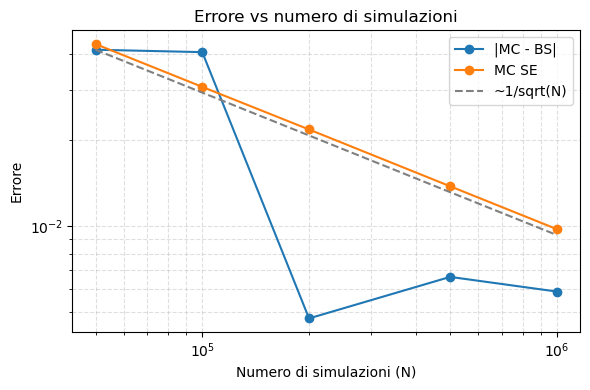

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from pricing.mc_pricer import price_european_mc
from pricing.black_scholes import bs_price

S0, K, r, vol, T = 100, 100, 0.02, 0.20, 1.0
steps = 252
n_list = [50_000, 100_000, 200_000, 500_000, 1_000_000]
bs = bs_price(S0, K, r, vol, T, call=True)
errs, ses = [], []

for n in n_list:
    p, se = price_european_mc(S0, K, r, vol, T, steps=steps, n_paths=n, call=True, antithetic=True, seed=123)
    errs.append(abs(p - bs))
    ses.append(se)

plt.figure(figsize=(6,4))
plt.loglog(n_list, errs, '-o', label='|MC - BS|')
plt.loglog(n_list, ses, '-o', label='MC SE')
plt.loglog(n_list, [errs[0]*(n_list[0]/x)**0.5 for x in n_list], '--', color='gray', label='~1/sqrt(N)')
plt.xlabel('Numero di simulazioni (N)')
plt.ylabel('Errore')
plt.title('Errore vs numero di simulazioni')
plt.legend()
plt.grid(True, which='both', ls='--', alpha=0.4)
plt.tight_layout()
plt.show()